In [1]:
pip install yfinance


  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23909 sha256=0c25ce8bca201cbdb80a6a070e7de3cba74ef887b9569f652b342365b6c1a534
  Stored in directory: /root/.cache/pip/wheels/fe/87/8b/7ec24486e001d3926537f5f7801f57a74d181be25b11157983
  Created wheel for multitasking: filename=multitasking-0.0.9-py3-none-any.whl size=8368 sha256=4a7ea434c83e90562871385bbc730ac8de34949f6a123df27f8ae0f15f5f2863
  Stored in directory: /root/.cache/pip/wheels/ae/25/47/4d68431a7ec1b6c4b5233365934b74c1d4e665bf5f968d363a
Successfully built yfinance multitasking
Note: you may need to restart the kernel to use updated packages.


In [2]:
import datetime

In [3]:
import yfinance as yf
import pandas as pd

# Fetch Price

In [4]:
ADA_price = yf.download(tickers='ADA-USD', period = '4y', interval = '1d')['Adj Close']
ADA_price.head()

[*********************100%***********************]  1 of 1 completed


Date
2017-10-01    0.024969
2017-10-02    0.025932
2017-10-03    0.020816
2017-10-04    0.021931
2017-10-05    0.021489
Name: Adj Close, dtype: float64

In [5]:
ADA_price.tail()

Date
2021-07-08    1.330146
2021-07-09    1.349474
2021-07-10    1.336085
2021-07-11    1.348145
2021-07-12    1.331838
Name: Adj Close, dtype: float64

# Plots

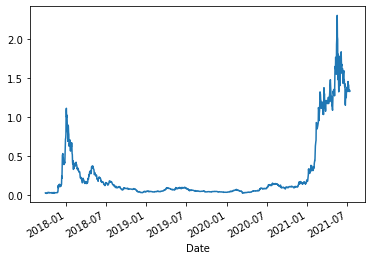

In [6]:
import matplotlib.pyplot as plt
ADA_price.plot()
plt.show()

In [7]:
ADA_daily_returns = ADA_price.pct_change().dropna(axis=0)
type(ADA_price)

pandas.core.series.Series

In [8]:
ADA_daily_cum_returns = (ADA_daily_returns +1).cumprod()-1
ADA_daily_cum_returns

Date
2017-10-02     0.038568
2017-10-03    -0.166326
2017-10-04    -0.121671
2017-10-05    -0.139373
2017-10-06    -0.257519
                ...    
2021-07-08    52.271895
2021-07-09    53.045974
2021-07-10    52.509750
2021-07-11    52.992751
2021-07-12    52.339656
Name: Adj Close, Length: 1376, dtype: float64

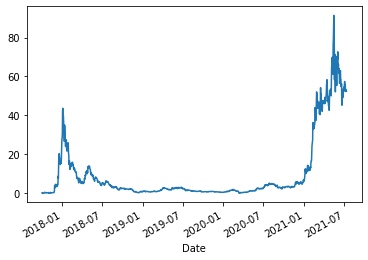

In [9]:
ADA_daily_cum_returns.plot()
plt.show()

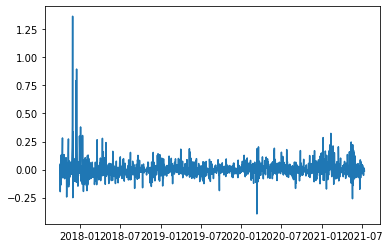

In [10]:
fig, axs = plt.subplots(1,1,gridspec_kw={'hspace':0.2,'wspace':0.1})
axs.plot(ADA_daily_returns)

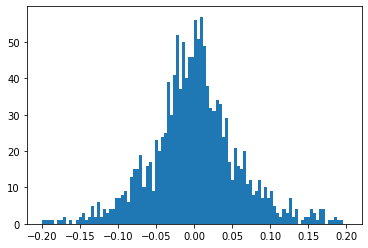

In [11]:
fig, axs = plt.subplots(1,1,gridspec_kw={'hspace':0.2,'wspace':0.1})
axs.hist(ADA_daily_returns,bins=100,range=(-0.2,0.2))
plt.show()

In [12]:
ADA_price1 = yf.download(tickers='ADA-USD', period = '4y', interval = '1d')
ADA_price1.head()
type(ADA_price1)

[*********************100%***********************]  1 of 1 completed


pandas.core.frame.DataFrame

In [13]:
ADA_daily_returns1 = ADA_price1.pct_change().dropna(axis=0)
type(ADA_daily_returns1)

pandas.core.frame.DataFrame

In [14]:
ADA_daily_returns = ADA_daily_returns1['Adj Close']
type(ADA_daily_returns)

pandas.core.series.Series

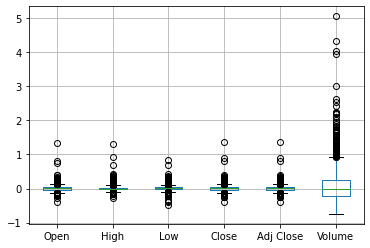

In [15]:
#fig, axs = plt.subplots(1,1,gridspec_kw={'hspace':0.2,'wspace':0.1})
ADA_daily_returns1.boxplot()#column='Adj Close')
plt.show()

# Prediction

In [16]:
pip install Prophet

     |████████████████████████████████| 65 kB 294 kB/s eta 0:00:01
     |████████████████████████████████| 49 kB 924 kB/s eta 0:00:01
  Created wheel for Prophet: filename=prophet-1.0.1-py3-none-any.whl size=6644127 sha256=4d1f52e7759894294034a42e80f1d669a620570b818d07d724a74bdb722d4254
  Stored in directory: /root/.cache/pip/wheels/4e/a0/1a/02c9ec9e3e9de6bdbb3d769d11992a6926889d71567d6b9b67
Successfully built Prophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, but you have cmdstanpy 0.9.68 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [17]:
from fbprophet import Prophet
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)

In [18]:
import datetime as dt


In [19]:
ADA_df = yf.download(tickers='ADA-USD', period = '6y', interval = '1d')

[*********************100%***********************]  1 of 1 completed


In [20]:
modelfb = Prophet()
ADA_df = ADA_df.reset_index()
ADA_df[['ds','y']] = ADA_df[['Date','Adj Close']]
modelfb.fit(ADA_df)


In [22]:
future = modelfb.make_future_dataframe(periods=180)

In [24]:
forecast = modelfb.predict(future)

In [25]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'weekly', 'weekly_lower', 'weekly_upper', 'yearly', 'yearly_lower',
       'yearly_upper', 'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')

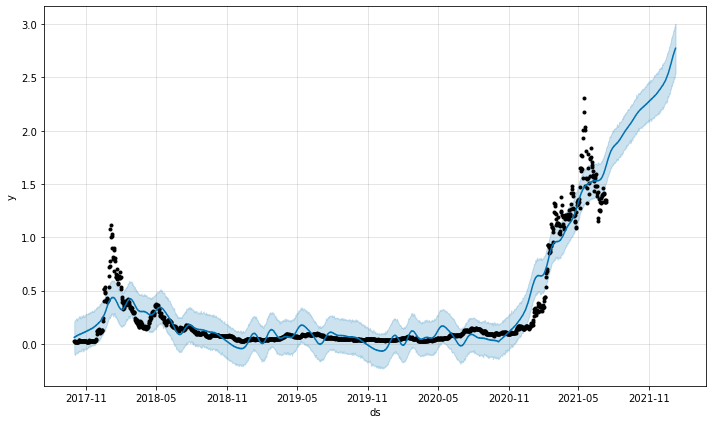

In [26]:
modelfb.plot(forecast)
plt.show()

In [27]:
import plotly.express as px
fig = px.line(forecast, x='ds', y="yhat")
fig.show()